In [1]:
%reset -f


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


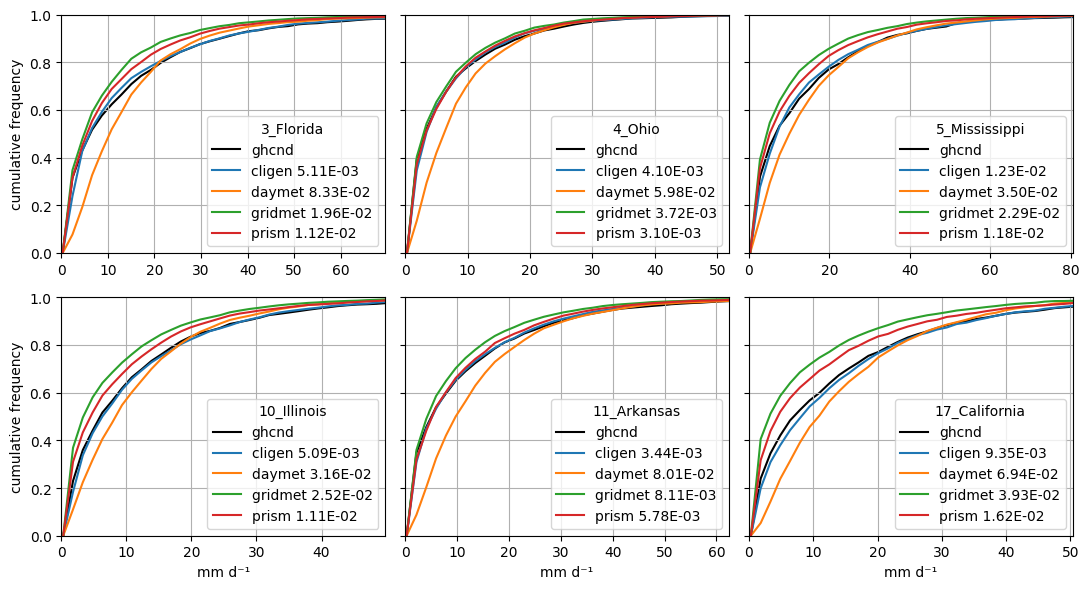

In [15]:
import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import os
from decimal import Decimal

dataDIR = '/content/drive/My Drive/Colab Notebooks/TeamProjects/24_us_stations'

def chi2_distance(A, B):
  chi = 0.5 * np.sum([((a - b)**2) / (a + b)
                    for (a, b) in zip(A, B)])
  return chi

lvlOneFolders = [ '3_Florida',
 '4_Ohio',
 '5_Mississippi',
 '10_Illinois',
 '11_Arkansas',
 '17_California',
 '18_Idaho']

fig, axs = plt.subplots(2, 3, figsize = (11, 6))
plt.rcParams['axes.grid'] = True

ax_inds = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2]]
for i, ax in enumerate(axs.reshape(-1)):

  lvlOneFolder = lvlOneFolders[i]

  files = os.listdir(os.path.join(dataDIR, lvlOneFolder))

  for f in files:
    if '_CLIGEN.cli' in f:
      cligen_file = f
    elif '_GHCND.cli' in f:
      ghcnd_file = f
    elif '_daymet.cli' in f:
      daymet_file = f
    elif '_gridmet.cli' in f:
      gridmet_file = f
    elif '_prism.cli' in f:
      prism_file = f
    else:
      pass

  with open(os.path.join(dataDIR, lvlOneFolder, cligen_file)) as f:
    lines = f.readlines()
    p = [float(l.split()[3]) for l in lines[15:-1] if float(l.split()[3]) > 0.0]
    cligen_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, ghcnd_file)) as f:
    lines = f.readlines()
    p = [float(l.split()[3]) for l in lines[15:-1] if float(l.split()[3]) > 0.0]
    ghcnd_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, daymet_file)) as f:
    lines = f.readlines()
    p = [float(l.split()[3]) for l in lines[15:-1] if float(l.split()[3]) > 0.0]
    daymet_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, gridmet_file)) as f:
    lines = f.readlines()
    p = [float(l.split()[3]) for l in lines[15:-1] if float(l.split()[3]) > 0.0]
    gridmet_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, prism_file)) as f:
    lines = f.readlines()
    p = [float(l.split()[3]) for l in lines[15:-1] if float(l.split()[3]) > 0.0]
    prism_p = p

  max_value = max(max(cligen_p), max(ghcnd_p), max(daymet_p), max(gridmet_p), max(prism_p))
  min_value = min(min(cligen_p), min(ghcnd_p), min(daymet_p), min(gridmet_p), min(prism_p))

  bins_pdf = np.linspace(min_value, max_value, 51)

  cligen_h = np.array(np.histogram(cligen_p, bins_pdf)[0], float)
  ghcnd_h = np.array(np.histogram(ghcnd_p, bins_pdf)[0], float)
  daymet_h = np.array(np.histogram(daymet_p, bins_pdf)[0], float)
  gridmet_h = np.array(np.histogram(gridmet_p, bins_pdf)[0], float)
  prism_h = np.array(np.histogram(prism_p, bins_pdf)[0], float)

  cligen_h[cligen_h == 0] = 1e-9
  ghcnd_h[ghcnd_h == 0] = 1e-9
  daymet_h[daymet_h == 0] = 1e-9
  gridmet_h[gridmet_h == 0] = 1e-9
  prism_h[prism_h == 0] = 1e-9

  cligen_pdf = np.array([count/len(cligen_p) for i, count in enumerate(cligen_h)])
  ghcnd_pdf = np.array([count/len(ghcnd_p) for i, count in enumerate(ghcnd_h)])
  daymet_pdf = np.array([count/len(daymet_p) for i, count in enumerate(daymet_h)])
  gridmet_pdf = np.array([count/len(gridmet_p) for i, count in enumerate(gridmet_h)])
  prism_pdf = np.array([count/len(prism_p) for i, count in enumerate(prism_h)])

  cligen_dev = round(chi2_distance(ghcnd_pdf, cligen_pdf), 5)
  daymet_dev = round(chi2_distance(ghcnd_pdf, daymet_pdf), 5)
  gridmet_dev = round(chi2_distance(ghcnd_pdf, gridmet_pdf), 5)
  prism_dev = round(chi2_distance(ghcnd_pdf, prism_pdf), 5)

  bins_cdf = np.linspace(min_value, max_value, 101)

  cligen_h = np.array(np.histogram(cligen_p, bins_cdf)[0], float)
  ghcnd_h = np.array(np.histogram(ghcnd_p, bins_cdf)[0], float)
  daymet_h = np.array(np.histogram(daymet_p, bins_cdf)[0], float)
  gridmet_h = np.array(np.histogram(gridmet_p, bins_cdf)[0], float)
  prism_h = np.array(np.histogram(prism_p, bins_cdf)[0], float)

  cligen_cdf = np.array([0.0] + [sum(cligen_h[:i+1])/len(cligen_p) for i, value in enumerate(cligen_h)])
  ghcnd_cdf = np.array([0.0] + [sum(ghcnd_h[:i+1])/len(ghcnd_p) for i, value in enumerate(ghcnd_h)])
  daymet_cdf = np.array([0.0] + [sum(daymet_h[:i+1])/len(daymet_p) for i, value in enumerate(daymet_h)])
  gridmet_cdf = np.array([0.0] + [sum(gridmet_h[:i+1])/len(gridmet_p) for i, value in enumerate(gridmet_h)])
  prism_cdf = np.array([0.0] + [sum(prism_h[:i+1])/len(prism_p) for i, value in enumerate(prism_h)])

  ghcnd, = ax.plot(bins_cdf, ghcnd_cdf, color='black', zorder=-999)
  cligen, = ax.plot(bins_cdf, cligen_cdf)
  daymet, = ax.plot(bins_cdf, daymet_cdf)
  gridmet, = ax.plot(bins_cdf, gridmet_cdf)
  prism, = ax.plot(bins_cdf, prism_cdf)

  ax.legend([ghcnd, cligen, daymet, gridmet, prism], ['ghcnd', 'cligen {}'.format('%.2E' % Decimal(str(cligen_dev))), 'daymet {}'.format('%.2E' % Decimal(str(daymet_dev))), 'gridmet {}'.format('%.2E' % Decimal(str(gridmet_dev))), 'prism {}'.format('%.2E' % Decimal(str(prism_dev)))], loc='lower right', title=cligen_file.split('_CLIGEN')[0])
  ax.set_xlim(0, 0.33*max_value)
  ax.set_ylim(0, 1)
  if i in [1, 2, 4, 5]:
    ax.get_yaxis().set_ticklabels([])
  if i in [0, 3]:
    ax.set_ylabel('cumulative frequency')
  if i > 2:
    ax.set_xlabel('mm d⁻¹')

fig.savefig(os.path.join(dataDIR, 'cdf_figure.jpg'), bbox_inches='tight', pad_inches=0.25, dpi=600)
plt.tight_layout()
plt.show()


